In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('./data/dataset.csv')
print(df.head())

   Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      221547 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849   
1      184524  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590   
2       91201  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793   
3       26115 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582   
4      201292 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.385675  0.352793 -1.098301  ...  0.507173  1.292565 -0.467752  1.244887   
1 -0.076217 -0.108390  0.973310  ...  0.124055  0.564916 -0.039331 -0.283904   
2 -1.633016  0.815350 -1.884692  ... -0.412088 -1.017485  0.129566  0.948048   
3  0.209454  0.770550 -0.558106  ...  0.011158  0.146017 -0.130401 -0.848815   
4  1.005246  0.132932 -1.558317  ...  0.254485  0.530692 -0.651119  0.626389   

        V25       V26       V27       V28  Amount  Class

In [3]:
# Get the shape of the dataset
print(df.shape)

# Get summary information about the dataset
print(df.info())

# Get basic statistics
print(df.describe())

(7300, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  7300 non-null   int64  
 1   V1          7300 non-null   float64
 2   V2          7300 non-null   float64
 3   V3          7300 non-null   float64
 4   V4          7300 non-null   float64
 5   V5          7300 non-null   float64
 6   V6          7300 non-null   float64
 7   V7          7300 non-null   float64
 8   V8          7300 non-null   float64
 9   V9          7300 non-null   float64
 10  V10         7300 non-null   float64
 11  V11         7300 non-null   float64
 12  V12         7300 non-null   float64
 13  V13         7300 non-null   float64
 14  V14         7300 non-null   float64
 15  V15         7300 non-null   float64
 16  V16         7300 non-null   float64
 17  V17         7300 non-null   float64
 18  V18         7300 non-null   float64
 19  V19         7300

In [4]:
# Get basic statistics
print(df.describe())

          Unnamed: 0           V1           V2           V3           V4  \
count    7300.000000  7300.000000  7300.000000  7300.000000  7300.000000   
mean   141459.804384    -0.193825     0.159880    -0.278411     0.193200   
std     82409.871073     2.521772     1.970007     2.488454     1.746604   
min       104.000000   -31.972536   -42.172688   -31.103685    -5.047408   
25%     70172.500000    -0.995027    -0.550039    -1.029977    -0.796602   
50%    141476.000000    -0.081147     0.103165     0.112765     0.050026   
75%    213021.250000     1.291141     0.884756     1.012824     0.871857   
max    284764.000000     2.446505    22.057729     3.757300    12.132323   

                V5           V6           V7           V8           V9  ...  \
count  7300.000000  7300.000000  7300.000000  7300.000000  7300.000000  ...   
mean     -0.128358    -0.048911    -0.202722     0.029468    -0.099865  ...   
std       1.826802     1.371383     2.175403     1.764826     1.307587  ...   

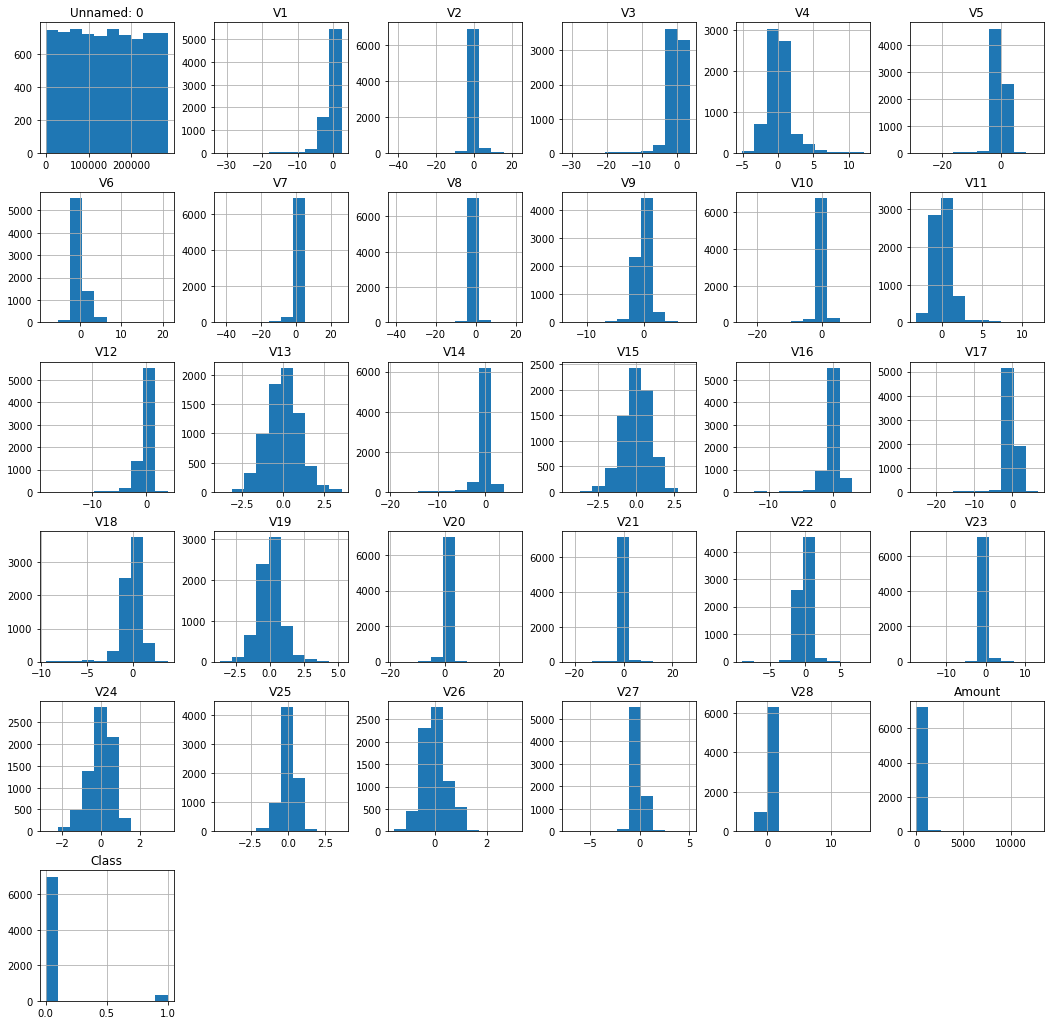

In [5]:
# Plot histograms for numerical columns
df.hist(figsize=(18, 18))
plt.show()


In [6]:
print(df['Class'].value_counts())

Class
0    7000
1     300
Name: count, dtype: int64


In [7]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

            Unnamed: 0        V1        V2        V3        V4        V5  \
Unnamed: 0    1.000000  0.139439 -0.038180 -0.185765 -0.125990  0.184853   
V1            0.139439  1.000000 -0.326759  0.484560 -0.279497  0.457110   
V2           -0.038180 -0.326759  1.000000 -0.408068  0.266135 -0.290087   
V3           -0.185765  0.484560 -0.408068  1.000000 -0.412628  0.507381   
V4           -0.125990 -0.279497  0.266135 -0.412628  1.000000 -0.321506   
V5            0.184853  0.457110 -0.290087  0.507381 -0.321506  1.000000   
V6           -0.032212  0.089315 -0.135573  0.170846 -0.110206  0.135049   
V7            0.116759  0.486588 -0.470636  0.608451 -0.408488  0.526807   
V8           -0.069866 -0.071541  0.031140 -0.139038  0.081011 -0.136278   
V9            0.050420  0.263985 -0.250592  0.367742 -0.314750  0.286929   
V10           0.075346  0.420311 -0.359026  0.591636 -0.448084  0.459243   
V11          -0.230156 -0.300984  0.282850 -0.447697  0.368131 -0.320181   
V12         

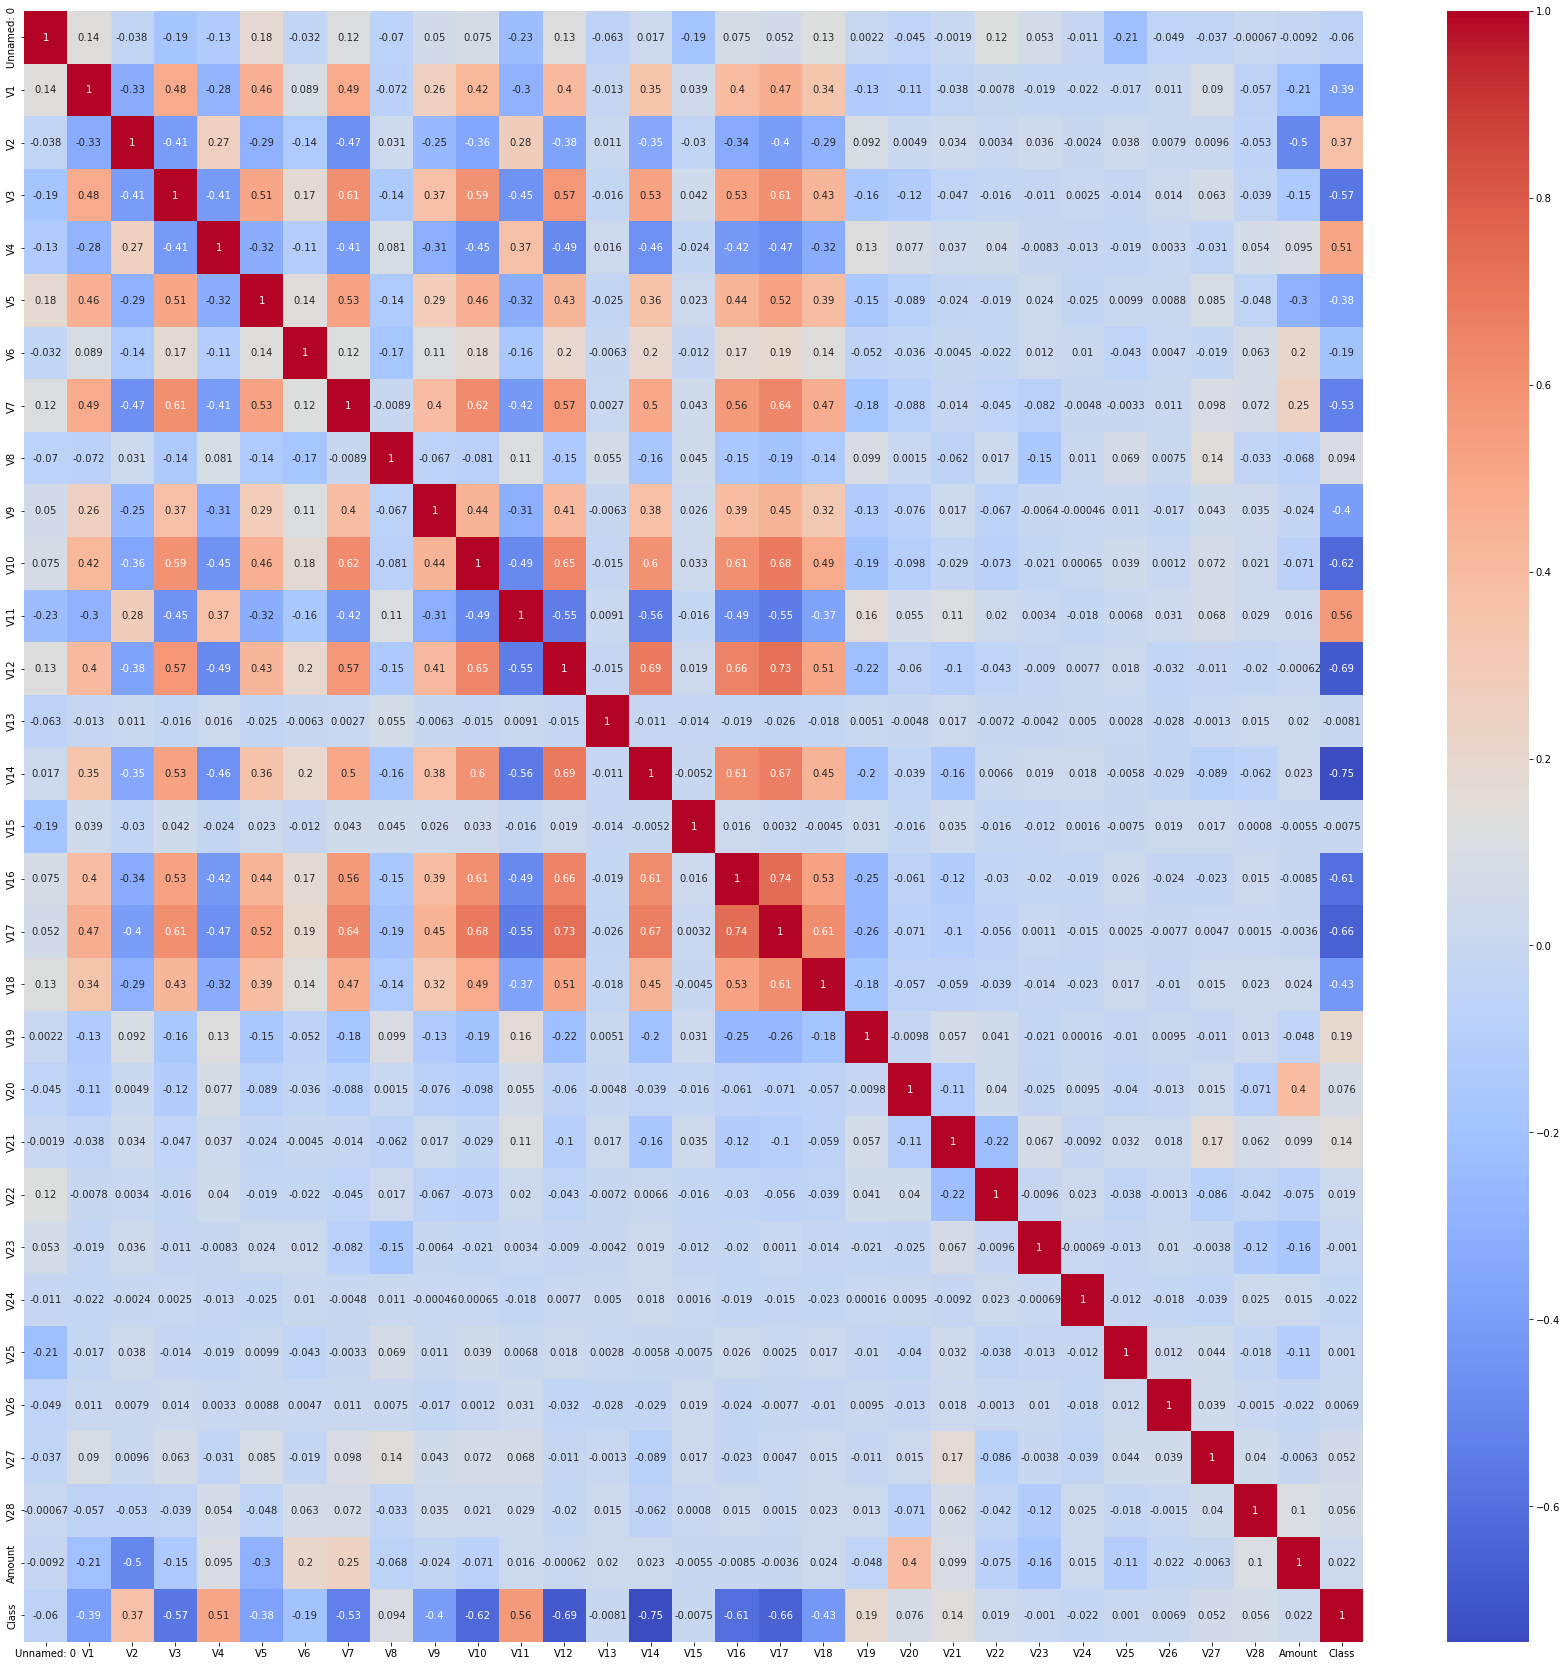

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [9]:
# Drop features with little to no correlation with the target variable
df_fs = df.drop(columns=['Unnamed: 0', 'V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])
print(df_fs.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849 -0.385675   
1  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590 -0.076217   
2  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793 -1.633016   
3 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582  0.209454   
4 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787  1.005246   

         V9       V10       V11       V12       V14       V16       V17  \
0 -1.098301 -0.334597 -0.679089 -0.039671 -0.732001  1.024751  0.380209   
1  0.973310 -0.029903  0.279973  0.885685  0.322019 -0.340285 -0.385399   
2 -1.884692  1.465259 -0.188235 -0.976779 -0.250847  0.136409 -0.078251   
3 -0.558106 -0.165442  0.017562  0.285377  0.637991 -0.605148  0.275686   
4 -1.558317  0.484216 -1.967998 -1.818338  0.346962  1.017093 -0.926787   

        V18       V19       V21  Amount  Class  
0 -1.087349  0.364507  0.507173   27.44      0  


In [10]:
# Scale the 'Amount' column and rearrange the dataset
df_fs['Scaled_Amount'] = RobustScaler().fit_transform(df_fs['Amount'].values.reshape(-1, 1))
scaled_amount = df_fs['Scaled_Amount']
df_fs.drop(['Scaled_Amount'], axis=1, inplace=True)
df_fs.insert(0, 'Scaled_Amount', scaled_amount)
df_fs = df_fs.drop(columns=['Amount'])
print(df_fs.head())

   Scaled_Amount        V1        V2        V3        V4        V5        V6  \
0       0.078662 -1.191668  0.428409  1.640028 -1.848859 -0.870903 -0.204849   
1       0.198521  1.966614 -0.450087 -1.228586  0.142873 -0.150627 -0.543590   
2       0.092183  1.528452 -1.296191 -0.890677 -2.504028  0.803202  3.350793   
3       0.300634 -0.774614  1.100916  0.679080  1.034016  0.168633  0.874582   
4      -0.158662 -1.075860  1.361160  1.496972  2.242604  1.314751  0.272787   

         V7        V9       V10       V11       V12       V14       V16  \
0 -0.385675 -1.098301 -0.334597 -0.679089 -0.039671 -0.732001  1.024751   
1 -0.076217  0.973310 -0.029903  0.279973  0.885685  0.322019 -0.340285   
2 -1.633016 -1.884692  1.465259 -0.188235 -0.976779 -0.250847  0.136409   
3  0.209454 -0.558106 -0.165442  0.017562  0.285377  0.637991 -0.605148   
4  1.005246 -1.558317  0.484216 -1.967998 -1.818338  0.346962  1.017093   

        V17       V18       V19       V21  Class  
0  0.380209 -1.08

In [11]:
# Describe the new dataset
print(df_fs.describe())

       Scaled_Amount           V1           V2           V3           V4  \
count    7300.000000  7300.000000  7300.000000  7300.000000  7300.000000   
mean        0.965042    -0.193825     0.159880    -0.278411     0.193200   
std         4.073334     2.521772     1.970007     2.488454     1.746604   
min        -0.307817   -31.972536   -42.172688   -31.103685    -5.047408   
25%        -0.237394    -0.995027    -0.550039    -1.029977    -0.796602   
50%         0.000000    -0.081147     0.103165     0.112765     0.050026   
75%         0.762606     1.291141     0.884756     1.012824     0.871857   
max       181.536268     2.446505    22.057729     3.757300    12.132323   

                V5           V6           V7           V9          V10  \
count  7300.000000  7300.000000  7300.000000  7300.000000  7300.000000   
mean     -0.128358    -0.048911    -0.202722    -0.099865    -0.219260   
std       1.826802     1.371383     2.175403     1.307587     1.863682   
min     -28.815577 

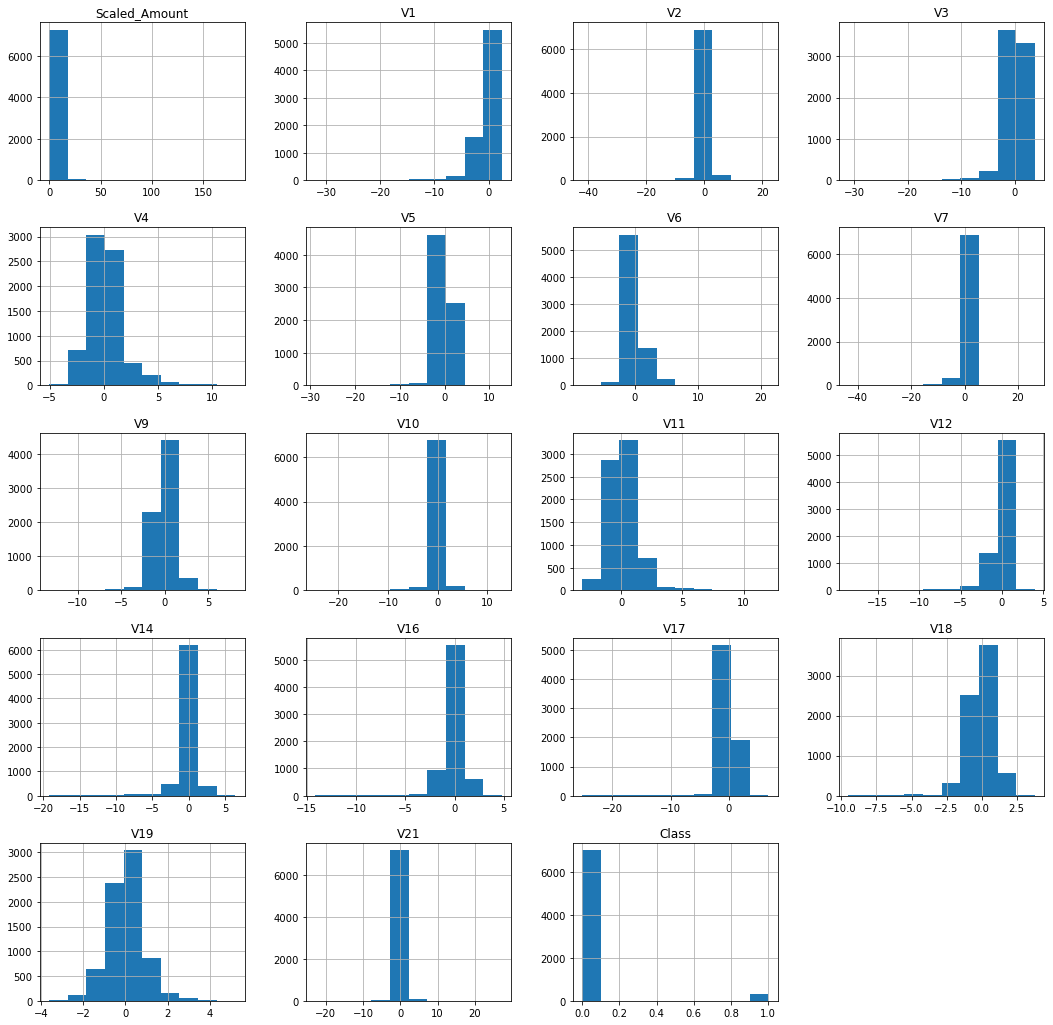

In [12]:
# Plot histograms for numerical columns
df_fs.hist(figsize=(18, 18))
plt.show()

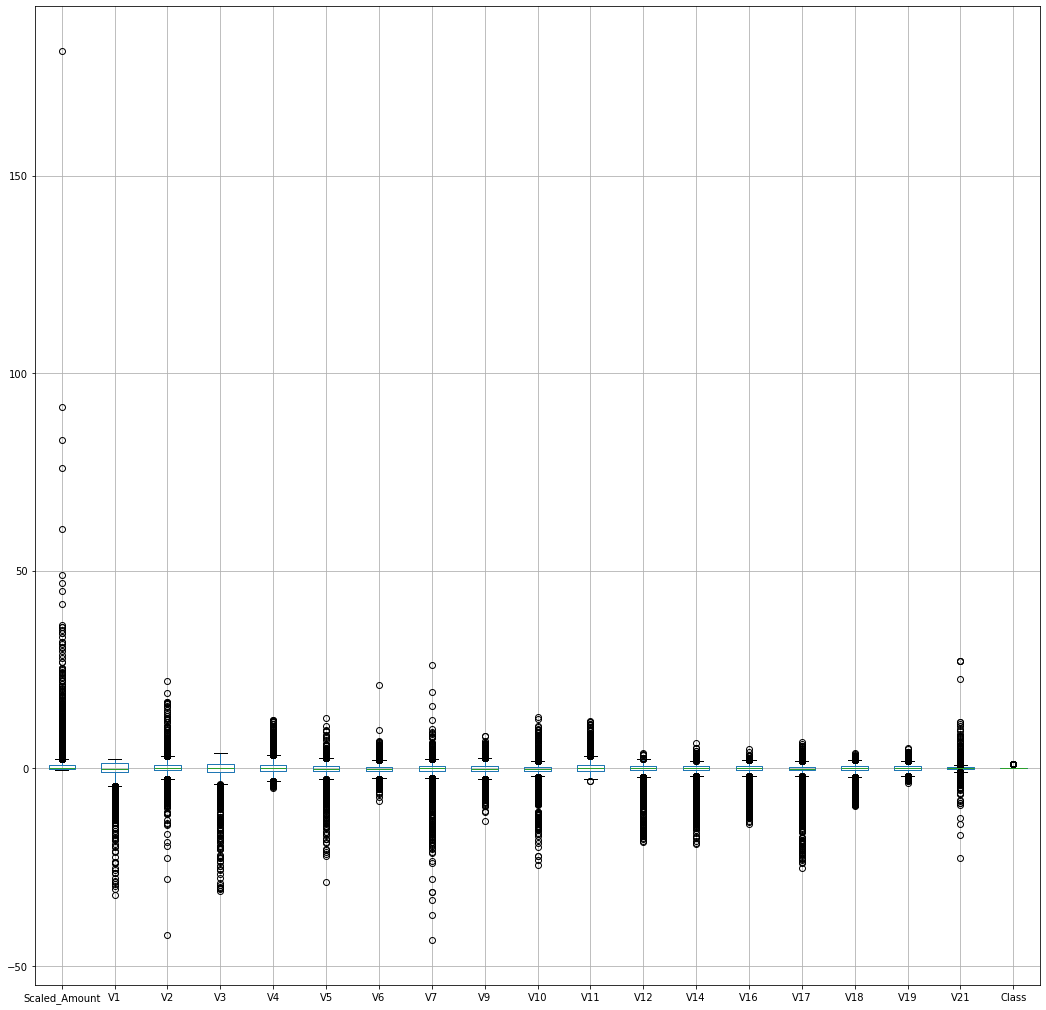

In [13]:
# Plot boxplots for numerical columns
df_fs.boxplot(figsize=(18, 18))
plt.show()

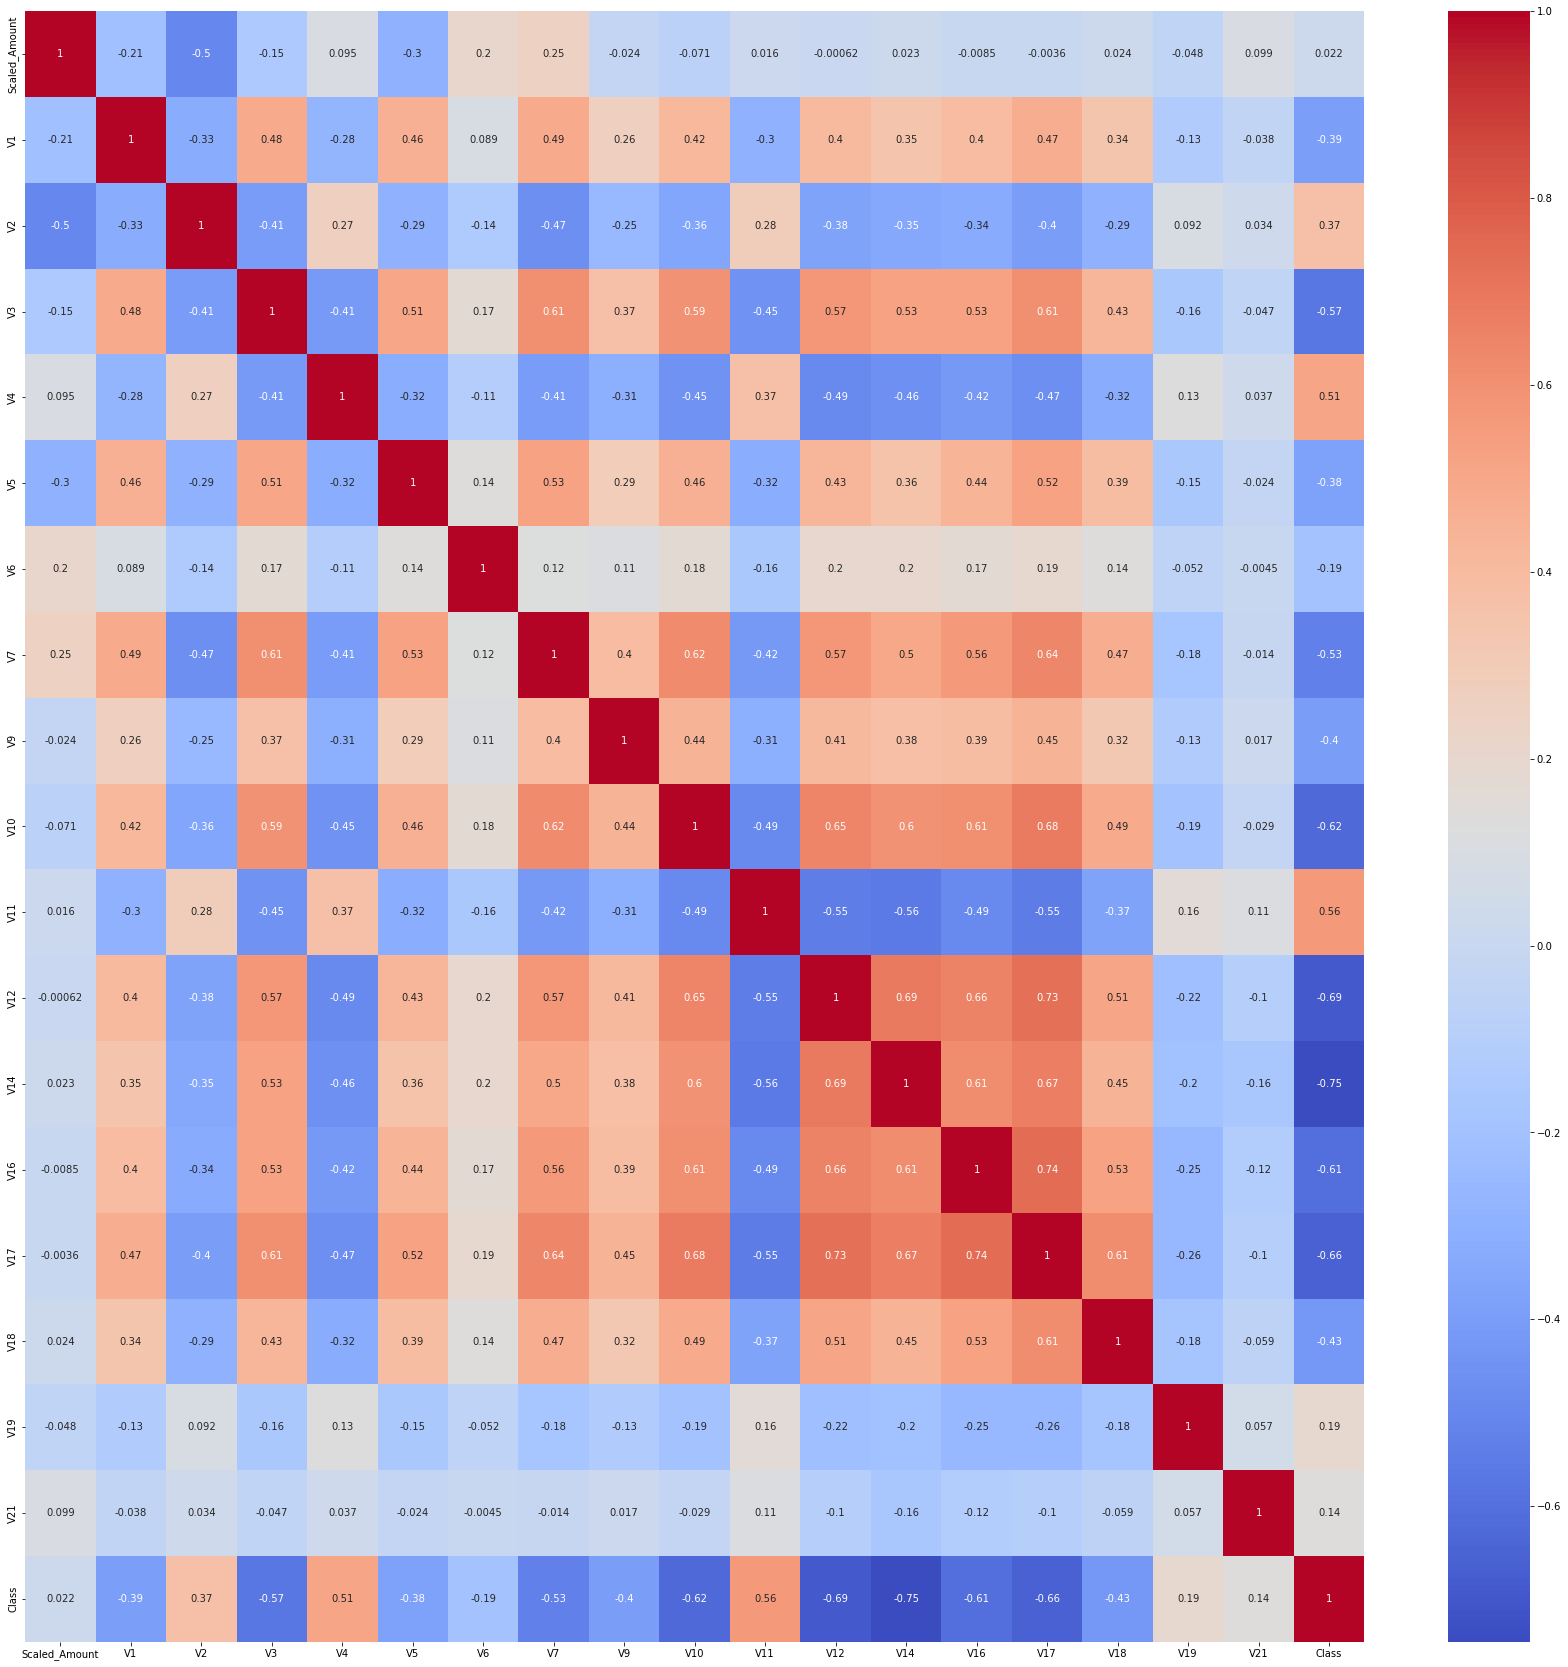

In [14]:
# Calculate the correlation matrix
correlation_matrix_fs = df_fs.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_fs, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Save the new dataset
df_fs.to_csv('./data/dataset_clean.csv', index=False)